In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv(r"C:\Users\mainakd\Documents\AKshayTask\nlp\machine_learning_self_study_udemy\model\datasets\diamonds.csv", index_col=0)

In [24]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
df = df.sample(frac=0.2)
df.shape

(10788, 10)

In [26]:
# Explore the relationships exist between the valuables off your data is to use a correlation matrix
correlation = df.corr()
correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.002689,0.180993,0.922294,0.975643,0.976549,0.899394
depth,0.002689,1.000000,-0.282010,-0.034912,-0.040627,-0.043297,0.074042
table,0.180993,-0.282010,1.000000,0.126637,0.189066,0.183159,0.135462
price,0.922294,-0.034912,0.126637,1.000000,0.884777,0.887782,0.812394
x,0.975643,-0.040627,0.189066,0.884777,1.000000,0.997276,0.917028
y,0.976549,-0.043297,0.183159,0.887782,0.997276,1.000000,0.915305
z,0.899394,0.074042,0.135462,0.812394,0.917028,0.915305,1.000000


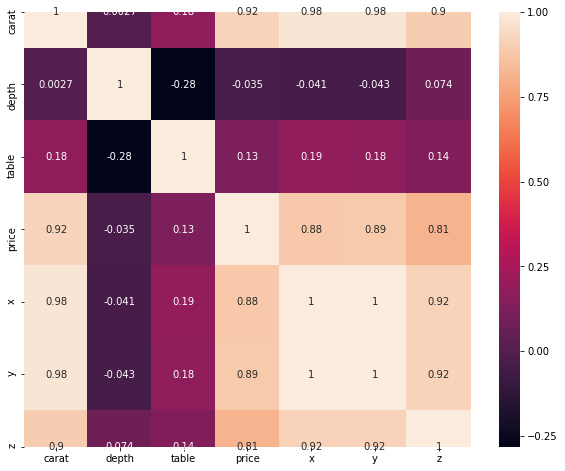

In [27]:
## Correlation representation
plt.subplots(figsize=(10,8))
sns.heatmap(correlation, annot=True)
plt.show()

In [28]:
# Categorical variable
df['cut'].unique()

array(['Premium', 'Ideal', 'Very Good', 'Good', 'Fair'], dtype=object)

In [29]:
df['clarity'].unique()

array(['VS1', 'VVS1', 'VS2', 'SI1', 'VVS2', 'SI2', 'IF', 'I1'],
      dtype=object)

In [30]:
df.color.unique()

array(['J', 'E', 'D', 'F', 'H', 'G', 'I'], dtype=object)

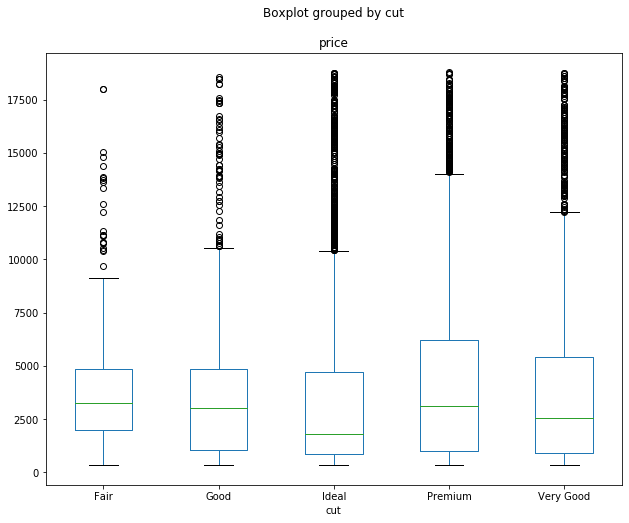

In [31]:
## plot between cut and price
df.boxplot(by="cut", column=['price'], grid=False, figsize=(10,8))

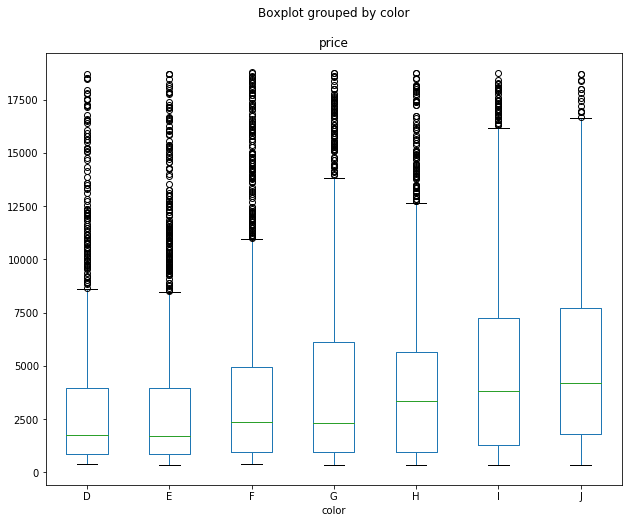

In [32]:
## plot between color and price
df.boxplot(by="color", column=['price'], grid=False, figsize=(10,8))

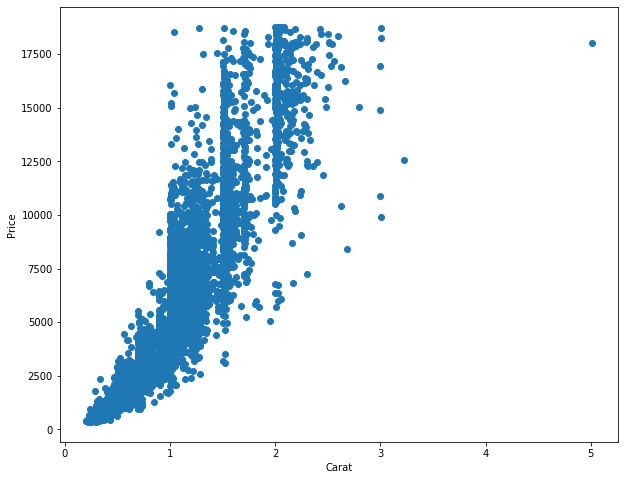

In [33]:
## If you have continuos data scatter plot is the best option
plt.subplots(figsize=(10,8))
plt.scatter(df['carat'],df['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [34]:
## Categorical data change to numeric value
clarity_dict = {'IF':7, 'VVS1':6, 'VVS2':5, 'VS1':4, 'VS2':3, 'SI1':2, 'SI2':1, 'I1':0}
df.clarity.replace(clarity_dict, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
19648,1.52,Premium,J,4,62.0,59.0,8258,7.36,7.34,4.56
38910,0.33,Ideal,E,6,60.9,56.0,1052,4.48,4.46,2.72
38242,0.41,Ideal,D,4,61.2,57.0,1018,4.77,4.81,2.93
45762,0.56,Very Good,F,3,60.8,57.0,1706,5.29,5.33,3.23
53783,0.73,Ideal,E,2,61.8,56.0,2728,5.77,5.81,3.58


In [35]:
df = pd.get_dummies(df, columns=['cut','color'])
df.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
19648,1.52,4,62.0,59.0,8258,7.36,7.34,4.56,0,0,0,1,0,0,0,0,0,0,0,1
38910,0.33,6,60.9,56.0,1052,4.48,4.46,2.72,0,0,1,0,0,0,1,0,0,0,0,0
38242,0.41,4,61.2,57.0,1018,4.77,4.81,2.93,0,0,1,0,0,1,0,0,0,0,0,0
45762,0.56,3,60.8,57.0,1706,5.29,5.33,3.23,0,0,0,0,1,0,0,1,0,0,0,0
53783,0.73,2,61.8,56.0,2728,5.77,5.81,3.58,0,0,1,0,0,0,1,0,0,0,0,0


In [36]:
Numeric_features = ['carat', 'depth', 'table','x','y','z']
numeric_df = df[Numeric_features]
numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.00000,10788.000000,10788.000000,10788.000000
mean,0.792955,61.749574,57.45762,5.720224,5.723039,3.534221
std,0.469153,1.432363,2.21926,1.118682,1.110168,0.742190
min,0.200000,43.000000,44.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.00000,4.710000,4.720000,2.900000
50%,0.700000,61.800000,57.00000,5.690000,5.700000,3.520000
75%,1.040000,62.500000,59.00000,6.530000,6.540000,4.040000
max,5.010000,71.600000,73.00000,10.740000,10.540000,31.800000


In [37]:
# ML models(Neural networks) don't works well when you have numeric features of different skills
# Standardize numeric data by subtracting then mean and dividing by the standard deviation

from sklearn.preprocessing import scale
numeric_array = scale(numeric_df)
numeric_array[:5]

array([[ 1.54977007,  0.17484259,  0.69502978,  1.46587895,  1.45656952,
         1.38216199],
       [-0.98683595, -0.59315491, -0.65683472, -1.10869966, -1.13775346,
        -1.09710396],
       [-0.81630782, -0.38370105, -0.20621322, -0.8494539 , -0.82247115,
        -0.81414426],
       [-0.49656756, -0.66297287, -0.20621322, -0.38459942, -0.35405173,
        -0.40991612],
       [-0.13419527,  0.03520668, -0.65683472,  0.04449701,  0.07833544,
         0.06168339]])

In [38]:
numeric_df =pd.DataFrame(numeric_array, columns=numeric_df.columns)
numeric_df.describe()

,carat,depth,table,x,y,z
count,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04
mean,1.646604e-16,-1.680854e-15,-1.038678e-15,7.798318e-16,-1.317284e-16,-8.233022e-18
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.263944e+00,-1.309057e+01,-6.064293e+00,-5.113600e+00,-5.155351e+00,-4.762106e+00
25%,-8.376238e-01,-5.233370e-01,-6.568347e-01,-9.030909e-01,-9.035437e-01,-8.545671e-01
50%,-1.981433e-01,3.520668e-02,-2.062132e-01,-2.701906e-02,-2.075329e-02,-1.916224e-02
75%,5.266013e-01,5.239324e-01,6.950298e-01,7.238997e-01,7.359242e-01,6.814999e-01
max,8.989060e+00,6.877366e+00,7.003731e+00,4.487433e+00,4.339151e+00,3.808608e+01


In [39]:
## replace non standardize data to standardize data
df.drop(Numeric_features, inplace=True, axis=1)
df.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
19648,4,8258,0,0,0,1,0,0,0,0,0,0,0,1
38910,6,1052,0,0,1,0,0,0,1,0,0,0,0,0
38242,4,1018,0,0,1,0,0,1,0,0,0,0,0,0
45762,3,1706,0,0,0,0,1,0,0,1,0,0,0,0
53783,2,2728,0,0,1,0,0,0,1,0,0,0,0,0


In [40]:
df = pd.concat([df, numeric_df], axis=1)
df.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.549770,0.174843,0.695030,1.465879,1.456570,1.382162
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986836,-0.593155,-0.656835,-1.108700,-1.137753,-1.097104
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.816308,-0.383701,-0.206213,-0.849454,-0.822471,-0.814144
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.496568,-0.662973,-0.206213,-0.384599,-0.354052,-0.409916
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.134195,0.035207,-0.656835,0.044497,0.078335,0.061683


In [41]:
df.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.549770,0.174843,0.695030,1.465879,1.456570,1.382162
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986836,-0.593155,-0.656835,-1.108700,-1.137753,-1.097104
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.816308,-0.383701,-0.206213,-0.849454,-0.822471,-0.814144
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.496568,-0.662973,-0.206213,-0.384599,-0.354052,-0.409916
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.134195,0.035207,-0.656835,0.044497,0.078335,0.061683


In [42]:
## Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\mainakd\Documents\AKshayTask\nlp\machine_learning_self_study_udemy\model\datasets\diamonds_processed.csv")

In [43]:
X = df.drop('price', axis =1)
Y = df["price"]
# X[np.isnan(X)] = np.median(X[~np.isnan(X)])

x_train, x_test,  y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)
x_train.shape, y_train.shape

((8630, 19), (8630,))

In [44]:
# first create the estimater object 
linear_regression = LinearRegression()
# Second fit on ur training data
linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred = linear_regression.predict(x_test)
y_pred

array([ -926.,  8615.,   609., ..., 16392., 13586., 10614.])

In [46]:
print("Training score or R^2 score: {}".format(linear_regression.score(x_train, y_train)))

Training score or R^2 score: 0.9091275126551162


In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Testing score or r^2 score: {}".format(score))

Testing score or r^2 score: 0.8907675291721099
